# Data Wrangling

**also called as Data Transformation **

Transforming or Converting the data from one to another format

Why we have to do this?
1. Better Analysis
2. In order to get accuracy using ML

1. Discretization
----

: Converting the continous variable to descrete categorical variable

: by converting, we can do some more analysis on data by groupby or crossbar

2. Encoding
----
---> Converting the discrete categorical variable to discreat numerical
---> Reson : Machine cant undurstand the text data

descrete Categorical
-----
1. Nominal : nominal encoding
      1. dimmies() ----> pandas
      2. one hot encoder ---> sklearn
2. Ordinal : ordinal encoding
      1. Label Encodig ---> alphabetical ---> sklearn
      2. Ordinal encoding ---> ordinal number----> sklearn
      3. map() ---->pandas

whenever you apply, nominal encoding by using dummies, it increases the number of columns

What is dummy variable trap?
: converting n categories of nominal variable to n columns. Else it lead to Coleaniarity Problem

Insted on converting, n categories will be to n columns, we convert to n-1 columns

Dimmy Encoding (Pandas)  === One Hot Encoding (sklearn)

----
Transformation
===
--> feature or variable transformation
columns = variable = feature =field

---> Converting skewed data to normal distributed data
1. in order to calculate Confidence Intervar in Statistics
2. all ML algorithms are designed by assuming the data is normally distributed
3. Statistical test


1. Left Skewed Data
---> exponantial transformation --->np.exp()
---> power transformation --> df[]**n
2. Right Skewed Data
---> log transformation --> np.log()
---> root transformation --> df**(1/n)


# Study data - Heart Strock analysis

In [1]:
path='/content/drive/MyDrive/Python/ML/heart.csv'

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(path)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df[df['Age']>=0 & (df['Age']<12)]['HeartDisease']

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [5]:
import matplotlib.pyplot as plt

In [6]:
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

(array([ 12.,  37.,  86., 104., 148., 201., 175., 101.,  39.,  15.]),
 array([28. , 32.9, 37.8, 42.7, 47.6, 52.5, 57.4, 62.3, 67.2, 72.1, 77. ]),
 <BarContainer object of 10 artists>)

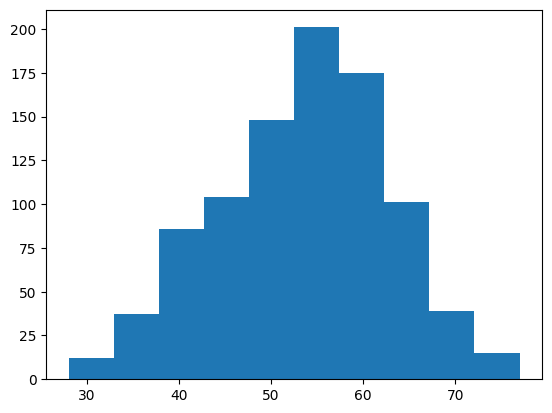

In [7]:
plt.hist(df['Age'])

In [8]:
df.groupby('HeartDisease')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
0,410.0,50.551220,9.444915,28.0,43.0,51.0,57.0,76.0
1,508.0,55.899606,8.727056,31.0,51.0,57.0,62.0,77.0


In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

Lable Encoding

Dummy Variable

In [11]:
df[['R_1','R_2','R_3']]=pd.get_dummies(df['RestingECG'])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,R_1,R_2,R_3
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,0,1,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0,1,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,0,1,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,1,0,0


In [12]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(drop='first')
enc.fit_transform(df[['RestingECG']])

<918x2 sparse matrix of type '<class 'numpy.float64'>'
	with 730 stored elements in Compressed Sparse Row format>

In [13]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,R_1,R_2,R_3
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0


In [14]:
df['Cholesterol'].skew()

-0.6100864307268192

In [15]:
df['Cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

(array([172.,   6.,  70., 319., 248.,  81.,  14.,   3.,   3.,   2.]),
 array([  0. ,  60.3, 120.6, 180.9, 241.2, 301.5, 361.8, 422.1, 482.4,
        542.7, 603. ]),
 <BarContainer object of 10 artists>)

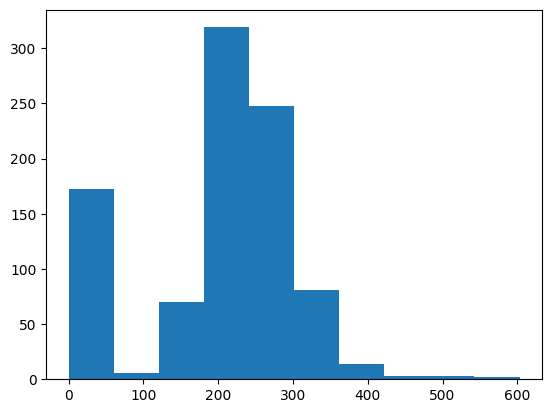

In [16]:
plt.hist(df['Cholesterol'])

In [17]:
import numpy as np

In [18]:
df['A']=np.log(df['Cholesterol'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
df['A'].describe()

count    918.000000
mean           -inf
std             NaN
min            -inf
25%        5.154733
50%        5.407172
75%        5.587249
max        6.401917
Name: A, dtype: float64

In [20]:
df[df['Cholesterol']==0].count()

Age               172
Sex               172
ChestPainType     172
RestingBP         172
Cholesterol       172
FastingBS         172
RestingECG        172
MaxHR             172
ExerciseAngina    172
Oldpeak           172
ST_Slope          172
HeartDisease      172
R_1               172
R_2               172
R_3               172
A                 172
dtype: int64

In [21]:
df['B']=np.exp(df['Cholesterol'])

In [22]:
df['B'].describe()

count     9.180000e+02
mean     8.255244e+258
std                inf
min       1.000000e+00
25%       1.941561e+75
50%       7.041569e+96
75%      9.049543e+115
max      7.578314e+261
Name: B, dtype: float64

(array([917.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000000e+000, 7.57831386e+260, 1.51566277e+261, 2.27349416e+261,
        3.03132554e+261, 3.78915693e+261, 4.54698831e+261, 5.30481970e+261,
        6.06265109e+261, 6.82048247e+261, 7.57831386e+261]),
 <BarContainer object of 10 artists>)

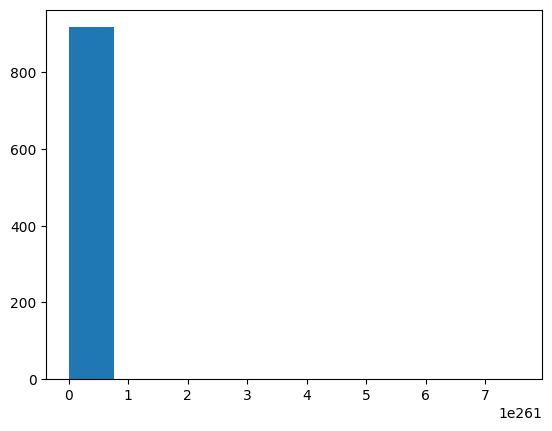

In [23]:
plt.hist(df['B'])

In [24]:
df['A']=np.log(df['Cholesterol'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,R_1,R_2,R_3,A,B
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1,0,5.666427,3.244182e+125
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0,5.192957,1.489384e+78
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,0,1,5.645447,8.041524e+122
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,1,0,5.365976,8.689987e+92
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0,5.273000,4.868823e+84


In [26]:
from scipy.stats import boxcox

df['RestingBP_new'], param = boxcox(df['RestingBP']+0.001)

print("aaaa : ", param)

aaaa :  1.0250474778223748


In [27]:
df['RestingBP_new'].skew()

0.22018381761403277

In [28]:
df['RestingBP'].skew()

0.1798393100516288

# Feature Scalling

scalling
-----
---> reducing magnitude of values

---> Machine should not take high magnitude values with more inportance

---> importants in ML

---> histogran is same after the scalling

In [30]:
dd=pd.DataFrame({'x':[1,2,3,4,5]})

In [31]:
dd

,x
0,1
1,2
2,3
3,4
4,5


In [32]:
dd.mean()

x    3.0
dtype: float64

using sklearn

In [45]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

dd['x_1']=sc.fit_transform(dd[['x']])

using pandas

In [34]:
dd['x_2'] = (dd['x']-dd['x'].mean())/dd['x'].std(ddof=0)
dd

,x,x_2
0,1,-1.414214
1,2,-0.707107
2,3,0.000000
3,4,0.707107
4,5,1.414214


Min Max Scaller
----
values between 0 to 1
negative vaues are not possible in result

In [36]:
xmin=1
xmax=5

In [38]:
#(x-xmin)/(xmax-xmin)

In [41]:
from  sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

dd['minmaxScaller_x'] = mm.fit_transform(dd[['x']])

In [42]:
dd

,x,x_2,minmaxScaller_x
0,1,-1.414214,0.00
1,2,-0.707107,0.25
2,3,0.000000,0.50
3,4,0.707107,0.75
4,5,1.414214,1.00


Interwiev Question 🇰

1. Standardization vs Normalization
Standardization
- convert the every values using Zscore
- converted values can be negative and positive
-negative
- scaled values will have mean = 0 and std deviation = 1
- formula

Normalization
- convert the every values between 0 to 1
- converted values can be positive or scaled values only positive
- scaled values will have minimum values of 0 to maximum value is 1
- formula



2. with scalling whether the data converted from skewed to normal?
- ans: No
- there will be no change in distribution of data by appliying


3. with scalling whether outliers can be removed ?
- ans : No


In [54]:
dd

,x,x_2,minmaxScaller_x,x_1,5
0,1,-1.414214,0.00,-1.414214,60
1,2,-0.707107,0.25,-0.707107,60
2,3,0.000000,0.50,0.000000,60
3,4,0.707107,0.75,0.707107,60
4,5,1.414214,1.00,1.414214,60
